<a href="https://colab.research.google.com/github/s10nenok/mnist/blob/main/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gzip
import torch
import torchvision
import numpy as np
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import random 
import math
import cv2
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



In [52]:
def read_train():
    reorder_type = np.dtype(np.int32).newbyteorder('>')
    way = 'MNIST/raw/'
    tr_im_way = way+'train-images-idx3-ubyte.gz'
    tr_im = gzip.open(tr_im_way,'r')            
    image_magic_number = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    num_images = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    image_rows = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    image_columns = np.frombuffer(tr_im.read(4), dtype=reorder_type)[0]
    buffer = tr_im.read(num_images * image_rows * image_columns)
    images = np.frombuffer(buffer, dtype = np.uint8).astype(np.float32)
    images = np.reshape(images, (num_images, 28,28))
    images = images/255
    images = torch.tensor(images)   
    tr_im.close()
 
    tr_lb_way = way+'train-labels-idx1-ubyte.gz'
    tr_lb = gzip.open(tr_lb_way,'r')
    label_magic_number = np.frombuffer(tr_lb.read(4), dtype=reorder_type).astype(np.int64)[0]
    num_labels = np.frombuffer(tr_lb.read(4), dtype=reorder_type).astype(np.int64)[0]
    buffer = tr_lb.read(num_labels)
    labels = np.frombuffer(buffer, dtype = np.uint8)
    labels = torch.tensor(labels, dtype = torch.long)
    tr_lb.close()

    permutation = np.random.permutation(len(labels)) 
    images = images[permutation] 
    labels = labels[permutation]

    plt.imshow(images[0].view(28,28))
    plt.show()

    for i in range(len(labels)):
      
      images[i] = rotate(images[i])
      images[i] = noise(images[i])
    plt.imshow(images[0].view(28,28))
    plt.show()


In [53]:
def noise(im):
    noise = np.random.normal(loc = 0.5 , scale = 0.1, size = im.shape)
    imr = np.clip(im + noise, 0, 1)
    return imr

In [54]:
def rotate(im):
    deg = random.randint(0,360)
    h,w = im.shape
    c = 3
    h2,w2,c2 = h//2,w//2,c//2
    np.array([[-w2,w2,w2],[h2,h2,-h2]])
    wr2,hr2 = (np.max(np.abs(rot_mat(deg) @ np.array([[-w2,w2,w2],[h2,h2,-h2]])),axis=1)).astype(np.int32)
    wr,hr = wr2*2,hr2*2
    imr = np.zeros((hr,wr))
    yr,xr = np.indices((hr,wr))
    yr,xr = yr.flatten(),xr.flatten()
    yrc,xrc = yr-hr2,xr-wr2
    xc , yc = (rot_mat(-deg) @ np.row_stack((xrc,yrc))).astype(np.int32)
    x,y = xc+w2,yc+h2
    include = np.logical_and(np.abs(xc)<w2,np.abs(yc)<h2)
    imr[yr[include],xr[include]] = im[y[include],x[include]]
    new_img = cv2.resize(imr, (28, 28) )
    new_img = torch.tensor(new_img)  
    return new_img

def rot_mat(deg):
    theta = deg/180*np.pi
    c,s = np.cos(theta),np.sin(theta)
    return np.array([[c,-s],[s,c]])






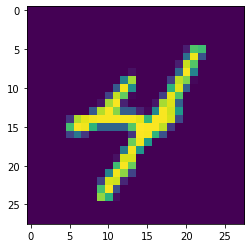

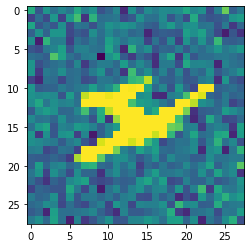

In [51]:
read_train()